# Project: Investigate a Dataset "TMDb Movie Data"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In my project, I will find answers for the following questions:
<li> Which genres are most popular from year to year?
<li> What is the most popular movie of decade according to the vote?

In [156]:
# import statements for all of the packages that I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [157]:
# load dataset
df = pd.read_csv('tmdb-movies.csv')

# print out a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [158]:
# investigate data shape

df.shape

(10866, 21)

Dataset consists of 10866 rows and 21 columns

In [159]:
# investigate some statistic information of dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- Statistics are displayed for integers and floats columns
- Most of movies with runtime 1h50m, the movie with runtime 900min can be series
- The most of movies have rating above 6.6 
- There is dataset with movies 1960-2015 years release

In [160]:
# investigate data type and missing values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- There are missing values in columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies
- All columns have appropriate data types

#### To find answers for the following questions I will use columns:

##### Which genres are most popular from year to year?
<li> 'popularity' - has float dtype and contains all values
<li> 'genres' - has str dtype and 23 missing values. Moreover, it contains multiple values separated by pipe (|) characters, so I will need to split values for separate rows. Besides, I will fill genres with NaN value searching genres on the IMDb website where it would be possible
<li> 'release_year' - has int dtype and contains all values

##### What is the most popular movie of decade according to the vote?
<li> 'vote_average' - has float dtype and contains all values
<li> 'original_title' - has str dtype and contains all values
<li> 'release_year' - has int dtype and contains all values
    
>I can delete all columns which I won't use in my investigation.

In [161]:
# check for duplicated rows
sum(df.duplicated())

1

There is 1 duplicated row which I will need to drop. Now I can see what is this row

In [162]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning

To clean data I will need to do the following:
1. Drop extraneous columns which aren't relevant to my questions
2. Drop duplicated rows
3. Fill missing values for 'genres' column according to information from [IMDb](https://www.imdb.com)
4. Split multiple values of genres for separate rows

In [163]:
# print out the list of columns in the dataframe
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [164]:
# drop extraneous columns
df.drop(['id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
#confirm changes
df.head()

,imdb_id,popularity,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,tt1392190,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,tt2908446,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,tt2488496,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,tt2820852,9.335014,Furious 7,Action|Crime|Thriller,7.3,2015


I left 'imdb_id' beacuse I will use it for searching missing genres

In [165]:
# drop duplicates
df.drop_duplicates(inplace=True)
# print number of duplicates to confirm dedupe
print(sum(df.duplicated()))
# check out the dimension of dataset after dedupe
print(df.shape)

0
(10865, 6)


Before filling missing values of genres I need:
1. Print out the list of movies with missing values in genre
2. Fiil in missing genres

In [166]:
# replace missing values in genres to '0'
df['genres'] = df['genres'].fillna('0')

In [167]:
# print out genres with missing values
df_genres = df.query('genres == "0"')
df_genres

,imdb_id,popularity,original_title,genres,vote_average,release_year
424,tt4835298,0.244648,Belli di papÃ,0,6.1,2015
620,tt5022680,0.129696,All Hallows' Eve 2,0,5.0,2015
997,NaN,0.330431,Star Wars Rebels: Spark of Rebellion,0,6.8,2014
1712,tt1073510,0.302095,Prayers for Bobby,0,7.4,2009
1897,tt1229827,0.020701,Jonas Brothers: The Concert Experience,0,7.0,2009
2370,tt1525359,0.081892,Freshman Father,0,5.8,2010
2376,tt1672218,0.068411,Doctor Who: A Christmas Carol,0,7.7,2010
2853,tt0270053,0.130018,Vizontele,0,7.2,2001
3279,tt1720044,0.145331,ì•„ê¸°ì™€ ë‚˜,0,6.1,2008
4547,tt2305700,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,0,8.3,2012


In [168]:
# fill in missing values
comedies = [424, 3279, 8234]
for comedy in comedies:
    df.at[comedy, 'genres'] = 'Comedy'

In [169]:
# fill in missing values
adventures = [2376, 4797, 5830]
for adventure in adventures:
    df.at[adventure, 'genres'] = 'Adventure|Drama|Family'

In [170]:
# fill in missing values
dramas = [4732, 6043]
for drama in dramas:
    df.at[drama, 'genres'] = 'Drama'

In [171]:
# fill in missing values
shorts = [4890, 9799]
for short in shorts:
    df.at[short, 'genres'] = 'Short|Comedy'

In [172]:
# fill in missing values
df.at[620, 'genres'] = 'Horror'
df.at[997, 'genres'] = 'Animation|Action|Adventure'
df.at[1712, 'genres'] = 'Biography|Drama|Romance'
df.at[1897, 'genres'] = 'Documentary|Music'
df.at[2370, 'genres'] = 'Drama|Family'
df.at[2853, 'genres'] = 'Comedy|Drama'
df.at[4547, 'genres'] = 'Sport'
df.at[5934, 'genres'] = 'Short|Comedy|Music'
df.at[6530, 'genres'] = 'Animation|Short|Horror'
df.at[8614, 'genres'] = 'Short|Action|Science Fiction'
df.at[8878, 'genres'] = 'Comedy|Family|Fantasy'
df.at[9307, 'genres'] = 'Biography'
df.at[10659, 'genres'] = 'Adult|Comedy|Drama'

In [173]:
# check that all movies with zero meaning in genre are gone
df_genres = df.query('genres == "0"')
df_genres

,imdb_id,popularity,original_title,genres,vote_average,release_year


Now I'm sure each movie has a genre.

My next step is split multiple genres. Before that I will creare a copy of a dataframe because I will use a copy of dataframe for genre related analysis and original dataframe for other analysis.

In [174]:
# create a copy of dataframe
df1genres = df.copy()
df1genres.head()

,imdb_id,popularity,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,tt1392190,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,tt2908446,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,tt2488496,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,tt2820852,9.335014,Furious 7,Action|Crime|Thriller,7.3,2015


In [175]:
# convert the 'genres' column with '|' sepataring into a list of genres
df1genres.genres = df1genres.genres.str.split('|')
df1genres.head()

,imdb_id,popularity,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015
1,tt1392190,28.419936,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015
2,tt2908446,13.112507,Insurgent,"[Adventure, Science Fiction, Thriller]",6.3,2015
3,tt2488496,11.173104,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015
4,tt2820852,9.335014,Furious 7,"[Action, Crime, Thriller]",7.3,2015


In [176]:
# breake up a list of genres into sepaarte rows
df1genres = df1genres.explode('genres')
df1genres

,imdb_id,popularity,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,Jurassic World,Action,6.5,2015
0,tt0369610,32.985763,Jurassic World,Adventure,6.5,2015
0,tt0369610,32.985763,Jurassic World,Science Fiction,6.5,2015
0,tt0369610,32.985763,Jurassic World,Thriller,6.5,2015
1,tt1392190,28.419936,Mad Max: Fury Road,Action,7.1,2015
...,...,...,...,...,...,...
10863,tt0060161,0.065141,Beregis Avtomobilya,Mystery,6.5,1966
10863,tt0060161,0.065141,Beregis Avtomobilya,Comedy,6.5,1966
10864,tt0061177,0.064317,"What's Up, Tiger Lily?",Action,5.4,1966
10864,tt0061177,0.064317,"What's Up, Tiger Lily?",Comedy,5.4,1966


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 "Which genres are most popular from year to year?"

In [177]:
# count average popularity for every genre in each year
df1genres_pop = df1genres.groupby(['release_year', 'genres']).popularity.mean()
df1genres_pop

release_year  genres         
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346479
              Drama              0.566305
                                   ...   
2015          Science Fiction    2.245603
              TV Movie           0.260574
              Thriller           1.401877
              War                1.284511
              Western            3.178796
Name: popularity, Length: 1058, dtype: float64

In [178]:
# extract a genre with max popularity for every year 
df1genres_pop_max = df1genres_pop.to_frame().groupby(level='release_year').popularity.nlargest(1).reset_index(level=0, drop=True).reset_index()
df1genres_pop_max

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.585717
7,1967,Animation,1.348805
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


For visualisation I will use scatter plot

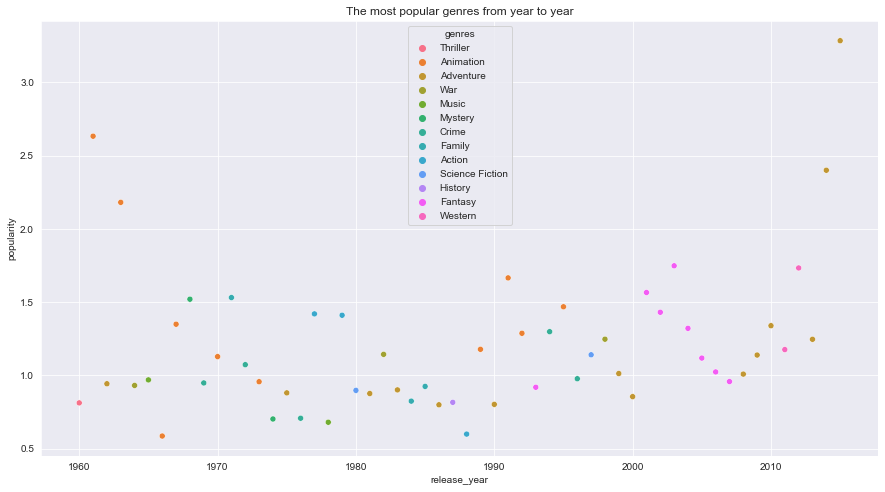

In [180]:
# create a scatter plot
plt.figure(figsize=(15,8))
plt.title('The most popular genres from year to year')
sns.scatterplot(data=df1genres_pop_max, x="release_year", y="popularity", hue="genres");

#### Conclusion
As we can see, viewers' preferences have changed over the time. If in the 60s and 80s, Animation and Crime were very popular, while since 2000s, people prefer Fantasy and Adventure. Moreover, Adventire has the highest popularity nowadays, just as Animation was popular in 1960s. Perhaps this was due to the beginning of the era of multicolor animation.

### Research Question 2  "What is the most popular movie of decade according to the vote?"

In [181]:
# create a copy of dataframe
df2vote = df.copy()
df2vote.head()

,imdb_id,popularity,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,tt1392190,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,tt2908446,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,tt2488496,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,tt2820852,9.335014,Furious 7,Action|Crime|Thriller,7.3,2015


In [182]:
# fill in bin edges list that will be used to 'cut' the data into groups of decades
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2015]

In [183]:
# labels for the six decades groups
bin_names = ['60s', '70s', '80s', '90s', '2000s', '2010s']

In [184]:
# create decade column
df2vote['decade'] = pd.cut(df2vote['release_year'], bin_edges, labels = bin_names)
# check for successful creation of this column
df2vote.head()

,imdb_id,popularity,original_title,genres,vote_average,release_year,decade
0,tt0369610,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,2010s
1,tt1392190,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,2010s
2,tt2908446,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,2010s
3,tt2488496,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015,2010s
4,tt2820852,9.335014,Furious 7,Action|Crime|Thriller,7.3,2015,2010s


In [185]:
# check that 'decade' column doesn't have NaN
df2vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   imdb_id         10855 non-null  object  
 1   popularity      10865 non-null  float64 
 2   original_title  10865 non-null  object  
 3   genres          10865 non-null  object  
 4   vote_average    10865 non-null  float64 
 5   release_year    10865 non-null  int64   
 6   decade          10865 non-null  category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 863.0+ KB


In [186]:
# max values - index
ind = df2vote.groupby('decade').vote_average.idxmax()
# use index to get movies
df2vote_max = df2vote.loc[ind][['decade', 'original_title', 'vote_average']]
df2vote_max

,decade,original_title,vote_average
10141,60s,Psycho,8.0
7269,70s,The Godfather,8.3
8411,80s,Queen - Rock Montreal,8.5
8221,90s,A Personal Journey with Martin Scorsese Throug...,8.5
6911,2000s,Pink Floyd: Pulse,8.7
3894,2010s,The Story of Film: An Odyssey,9.2


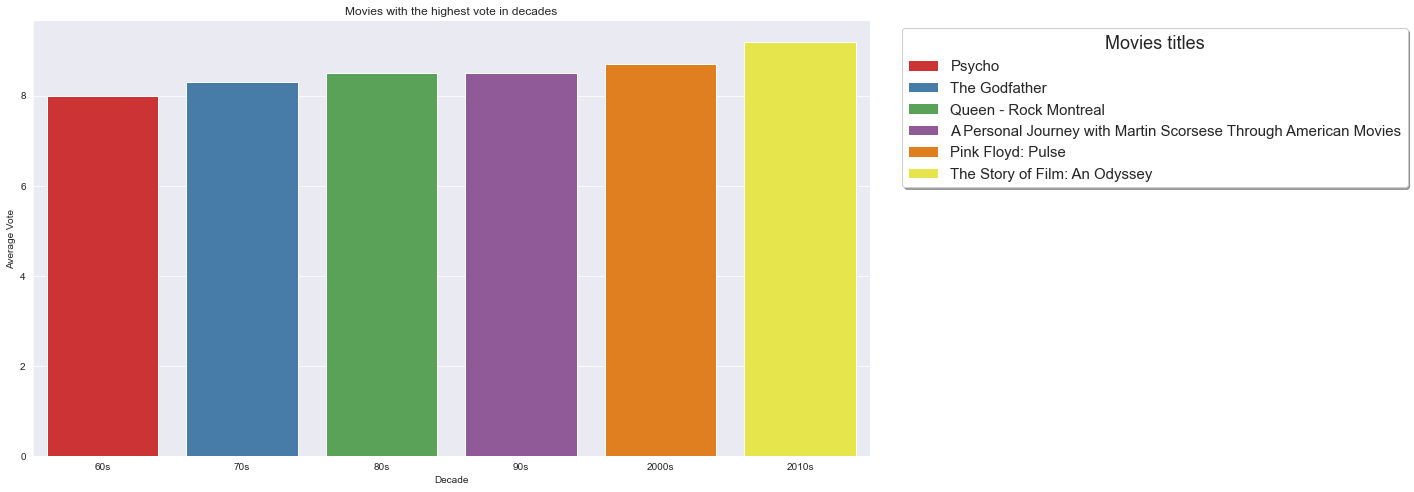

In [187]:
# create a barplot
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.barplot(x = "decade", y = "vote_average", hue = 'original_title', data = df2vote_max, dodge=False)
plt.title('Movies with the highest vote in decades')
plt.xlabel('Decade')
plt.ylabel('Average Vote')
plt.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Movies titles", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');
sns.despine()
plt.show()

#### Conclusion
The graph clearly shows us the most popular Audience Vote movie in each decade. As we can see, viewers are getting more generous with each passing year when evaluating the movie. Does this indicate that people are watching more movis or that movies are being produced with higher quality? Perhaps people who evaluate movies of the past decades now, in one way or another, compare the quality of the material (video sequence, sound, plot, costumes, scenery) with modern movies. Of course, the movies of those times are outperformed by the modern ones.